#Chess Games from 12 Top players

The aim is to answer some questions:
- The most sacrificed piece?
- Player with the most wins?
- And the player who loses the most?
- Who is the most aggressive?
- Who is the most positional?

In [1]:
%cd ..
from google.colab import drive
drive.mount('content/gdrive')

/
Drive already mounted at content/gdrive; to attempt to forcibly remount, call drive.mount("content/gdrive", force_remount=True).


In [2]:
# rename the path
!ln -s /content/gdrive/My\Drive/ /mydrive
!ls 

bin	 dev   lib32  mydrive	  root	sys		   usr
boot	 etc   lib64  opt	  run	tensorflow-1.15.2  var
content  home  media  proc	  sbin	tmp
datalab  lib   mnt    python-apt  srv	tools


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data: Piece information

In [4]:
path = "/mydrive/Data_Science_Projects/AnalysisChessGames/data/"
df = pd.read_csv(path+"Player_piece_info.csv")
print(df.shape)



(1787199, 9)


In [5]:
df.head(10)

,queen,rook,knight,bishop,pawn,move_num,file_name,color,player
0,1,2,2,2,8,1,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
1,1,2,2,2,8,2,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
2,1,2,2,2,8,3,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
3,1,2,2,2,8,4,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
4,1,2,2,2,8,5,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
5,1,2,2,2,8,6,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
6,1,2,2,2,8,7,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
7,1,2,2,2,8,8,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
8,1,2,2,2,8,9,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine
9,1,2,2,2,8,10,Bogoljubow-Efim-D_vs_Alekhine-Alexander-A_1921...,Black,Alekhine


Describe 

- queen: how many queens of the player on board
- rook: how many rooks of the player on board
- knight: how many knights of the player on board	
- bishop: how many bishops of the player on board	
- pawn: how many pawns of the player on board	
- move_num: the move number of the game. For example, 7 means 7th move.	
- file_name: the corresponding pgn file of the game	
- color: the color of the player
- player: the name of the player

In [6]:
df = df.drop('file_name', axis=1)


In [7]:
df.head(10)

,queen,rook,knight,bishop,pawn,move_num,color,player
0,1,2,2,2,8,1,Black,Alekhine
1,1,2,2,2,8,2,Black,Alekhine
2,1,2,2,2,8,3,Black,Alekhine
3,1,2,2,2,8,4,Black,Alekhine
4,1,2,2,2,8,5,Black,Alekhine
5,1,2,2,2,8,6,Black,Alekhine
6,1,2,2,2,8,7,Black,Alekhine
7,1,2,2,2,8,8,Black,Alekhine
8,1,2,2,2,8,9,Black,Alekhine
9,1,2,2,2,8,10,Black,Alekhine


In [8]:
df.isna().sum()

queen       0
rook        0
knight      0
bishop      0
pawn        0
move_num    0
color       0
player      0
dtype: int64

In [9]:
df.duplicated(keep=False).sum()

1655518

In [10]:
df = df.drop_duplicates(keep=False)

In [11]:
df.shape

(131681, 8)

In [12]:
df.move_num.min(), df.move_num.max() # Game moves range from 1 to 363

(3, 363)

In [13]:
df_queen = df.nlargest(10, 'queen')[['queen','move_num', 'player']]
df_queen

,queen,move_num,player
75954,3,45,Alekhine
75955,3,46,Alekhine
75956,3,47,Alekhine
1273291,3,155,Nakamura
1273292,3,156,Nakamura
1273293,3,157,Nakamura
23265,2,82,Alekhine
23266,2,83,Alekhine
23267,2,84,Alekhine
23268,2,85,Alekhine


Text(0, 0.5, 'Num of queen ')

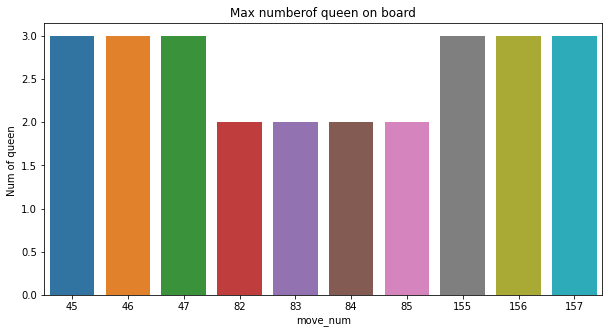

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(10, 5))

# Add title
plt.title("Max numberof queen on board")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df_queen.move_num, y=df_queen['queen'])

# Add label for vertical axis
plt.ylabel("Num of queen ")

In [15]:
df.sort_values(by='pawn', ascending=True).head(10)

,queen,rook,knight,bishop,pawn,move_num,color,player
436052,0,1,0,0,0,118,White,Botvinnik
832641,0,0,0,1,0,115,White,Caruana
832640,0,0,0,1,0,114,White,Caruana
832639,0,0,0,1,0,113,White,Caruana
832638,0,0,0,1,0,112,White,Caruana
830929,0,0,1,0,0,190,Black,Caruana
830928,0,0,1,0,0,189,Black,Caruana
830927,0,1,1,0,0,188,Black,Caruana
830926,0,1,1,0,0,187,Black,Caruana
830925,0,1,1,0,0,186,Black,Caruana
